In [22]:
#import requests to install tesseract
import requests

In [23]:
# Downloading tesseract-ocr file
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream = True)

# Writing data to file to avoid path isuues
with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
         if block:
             file.write(block)

In [24]:
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev
from IPython.display import HTML, clear_output

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
libmagickwand-dev is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [25]:
! pip install pytesseract wand opencv-python

In [26]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

In [27]:
image_path = '/content/drive/MyDrive/erferno.png'
img = Image.open(image_path)

# Resize image
img = img.resize((300, 150))

# Save image to file
img.save('/content/sample.png')

# Display image
img.show()

In [29]:
# extracting text from image
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(img,config=custom_config)
print(text)

we are creating optical recognition tool
we are creating optical recognition tool
we are creating optical recognition tool
‘we are creating optical recognition tool
we are creating optical recognition tool
WE ARE CREATING OPTICAL RECOGNITION TOOL



In [30]:
# Extracting text from image and removing irrelevant symbols from characters
try:
  text=pytesseract.image_to_string(img,lang="eng")
  characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~"
  new_string = text
  for character in characters_to_remove:
    new_string = new_string.replace(character, "")
  print(new_string)
except IOError as e:
    print("Error (%s)." % e)

 

we are creating optical recognition tool
we are creating optical recognition tool
we are creating optical recognition tool
‘we are creating optical recognition tool
we are creating optical recognition tool
WE ARE CREATING OPTICAL RECOGNITION TOOL



In [32]:
image = cv2.imread('sample.png')

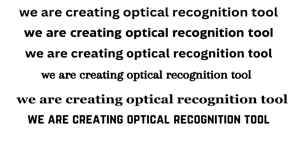

In [34]:
# grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
Image.fromarray(gray)

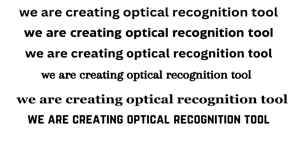

In [35]:
# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
noise = remove_noise(gray)
Image.fromarray(gray)

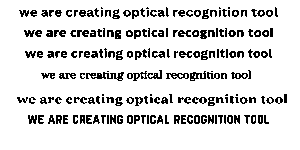

In [37]:
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(gray)
Image.fromarray(thresh)

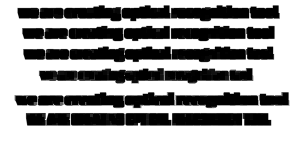

In [38]:
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)
erode = erode(gray)
Image.fromarray(erode)

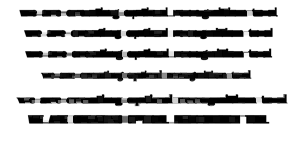

In [39]:
#Morphology
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
opening = opening(gray)
Image.fromarray(opening)

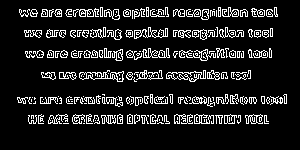

In [40]:
#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)
canny = canny(gray)
Image.fromarray(canny)

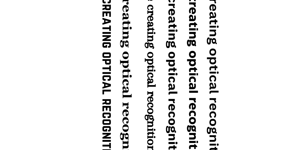

In [41]:
#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
rotated = deskew(gray)
Image.fromarray(rotated)

In [42]:
#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
match = match_template(gray, gray)
match

array([[1.]], dtype=float32)

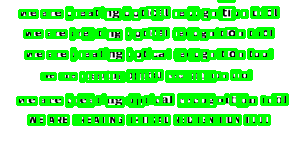

In [43]:
# Drawing rectangle around text
img = cv2.imread('sample.png')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)

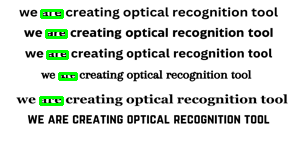

In [48]:
# Drawing pattern on specific pattern or word
img = cv2.imread('sample.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = 'are'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
Image.fromarray(img)